
1. 心脏病：曾报告患有冠心病 (CHD) 或心肌梗塞 (MI) 的受访者。
2. BMI：体重指数（BMI）。
3. 吸烟：你一生至少抽过100支烟吗？ （答案是或否）。
4. 喝酒 : 重度饮酒者（成年男性每周饮酒超过 14 杯，成年女性每周饮酒超过 7 杯
5. 中风：（曾经说过）（你有过）中风吗？
6. 身体健康：现在想想你的身体健康，包括身体疾病和受伤，过去30天有多少天身体健康不好？ （0-30 天）。
7. 精神健康：想想你的心理健康，过去30天有多少天你的心理健康不好？ （0-30 天）。
8. 走路困难 : 你走路或爬楼梯有严重的困难吗？
9. 性别：你是男性还是女性？
10. 年龄分类：十四级年龄类别。
11. 种族：估算的种族/民族价值。
12. 糖尿病：（曾经说过）（你有）糖尿病？
13. 体力活动：报告在过去 30 天内在正常工作之外进行体力活动或锻炼的成年人。
14. 一般健康 : 你会说总体上你的健康是...
15. 睡眠时间 ：平均而言，您在 24 小时内的睡眠时间是多少小时？
16. 哮喘：（曾经说过）（你有）哮喘？
17. 肾病：不包括肾结石、膀胱感染或失禁，你有没有告诉过你有肾病？
18. 皮肤癌：（曾经说过）（你有）皮肤癌？




 






导包

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score

import random, os
from sklearn.neural_network import MLPClassifier  # 多层感知机
from sklearn.neighbors import KNeighborsClassifier  # K最近邻
from sklearn.svm import SVC  # 支持向量机
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB  # 高斯朴素贝叶斯
import joblib

读取数据

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


数值特征总结

In [3]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


数据清洗

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

##### 输出显示我们有大约 319795 个条目，共 18 列。 没有空值，我们有 14 个数字特征和 4 个分类特征。 我们可以转换只有两种可能唯一值的字符串属性，但首先要确保没有异常值。

In [5]:
df.nunique()


HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

处理变量，把YES和NO转换为1和0

In [6]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

分类特征的可视化

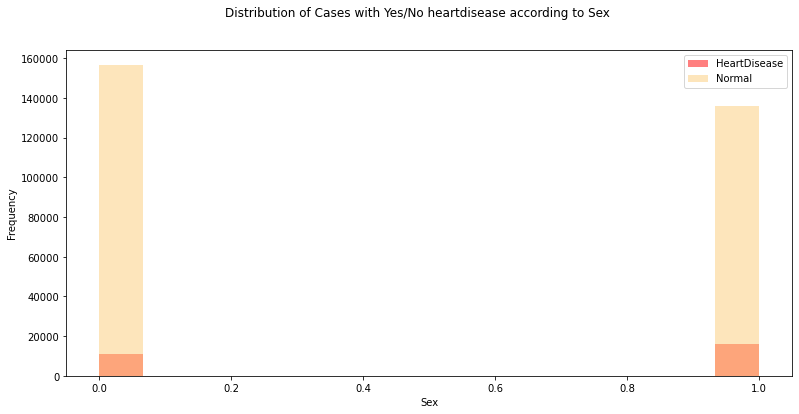

In [7]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Sex"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Sex"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to Sex")

ax.legend();

心脏病患者(男女比例)

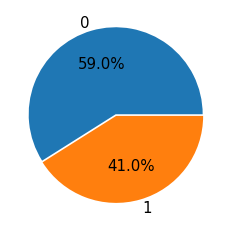

In [8]:
label=[0,1]
explode=[0.01,0.01]
data_sex=(df[df["HeartDisease"]==1]["Sex"])
plt.pie(data_sex.value_counts(),explode=explode,labels=label,autopct='%1.1f%%',textprops={'fontsize': 15, 'color': 'black'})
plt.show()


正常人(男女比例)

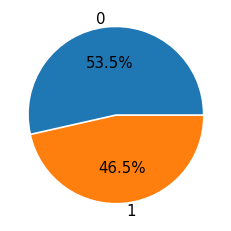

In [9]:
label=[0,1]
explode=[0.01,0.01]
data_sex=(df[df["HeartDisease"]==0]["Sex"])
plt.pie(data_sex.value_counts(),explode=explode,labels=label,autopct='%1.1f%%',textprops={'fontsize': 15, 'color': 'black'})
plt.show()

- Distribution of Cases with Yes/No heartdisease according to Sex (按性别分列的有/无心脏病病例分布情况)
- 左边为女性,右边为男性
- 大多数心脏病病例是男性。
- 大多数没有患心脏病的病例是女性

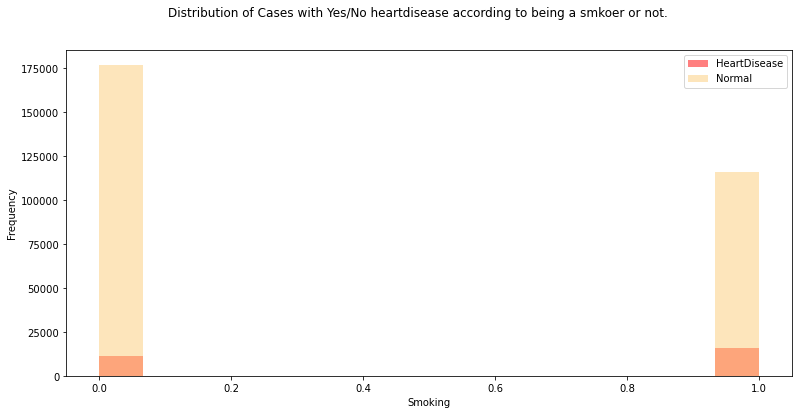

In [10]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Smoking"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Smoking"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to being a smkoer or not.")

ax.legend();

心脏病患者(是否吸烟)的比例

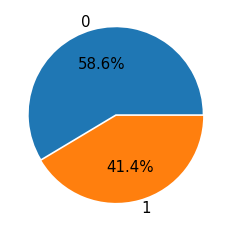

In [11]:
label=[0,1]
explode=[0.01,0.01]
data_sex=(df[df["HeartDisease"]==1]["Smoking"])
plt.pie(data_sex.value_counts(),explode=explode,labels=label,autopct='%1.1f%%',textprops={'fontsize': 15, 'color': 'black'})
plt.show()


正常人(是否吸烟)的比例

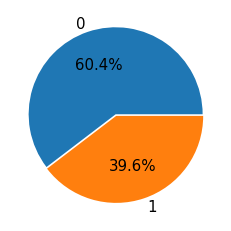

In [12]:
label=[0,1]
explode=[0.01,0.01]
data_sex=(df[df["HeartDisease"]==0]["Smoking"])
plt.pie(data_sex.value_counts(),explode=explode,labels=label,autopct='%1.1f%%',textprops={'fontsize': 15, 'color': 'black'})
plt.show()

- Distribution of Cases with Yes/No heartdisease according to being a smoker or not(按是否吸烟者分列的有/无心脏病的病例分布情况)
- 对于吸烟者来说，他们是患有心脏病的最大群体。
- 也有心脏病的病例，虽然他们不吸烟，但这与其他因素有关。

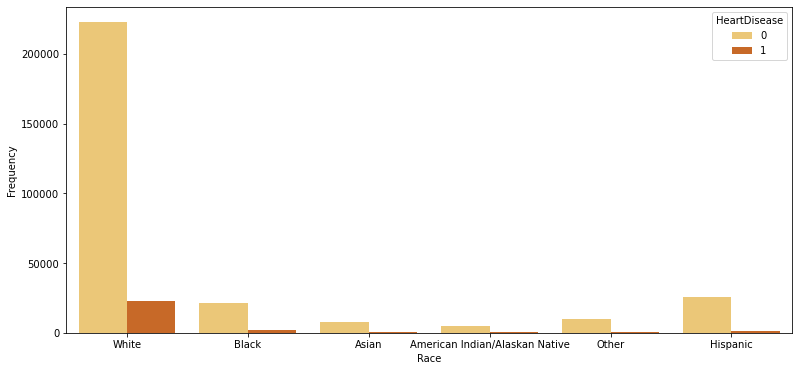

In [13]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['Race'], hue = 'HeartDisease', data = df, palette = 'YlOrBr')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

- 1 指心脏病。
- 0 表示正常状态。
- 我们可以看到,白人相比其他人中更容易患心脏病。

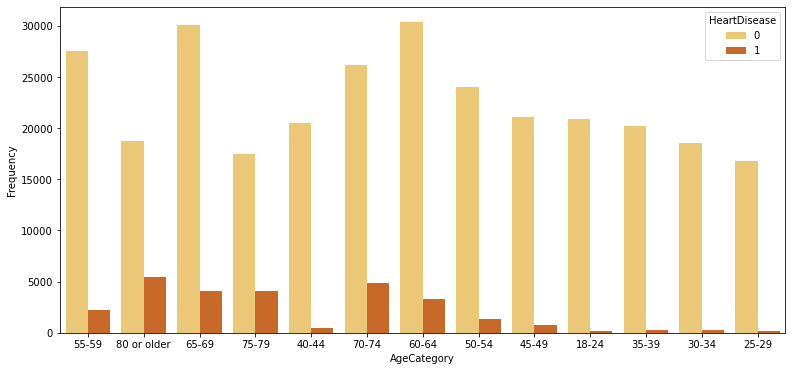

In [14]:
plt.figure(figsize = (13,6))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.ylabel('Frequency')
plt.show()

- 1代表心脏病
- 0代表正常人群
- 由表可知,从60岁开始患心脏病的人群开始快速上升
- 80岁或以上的人最容易患心脏病。

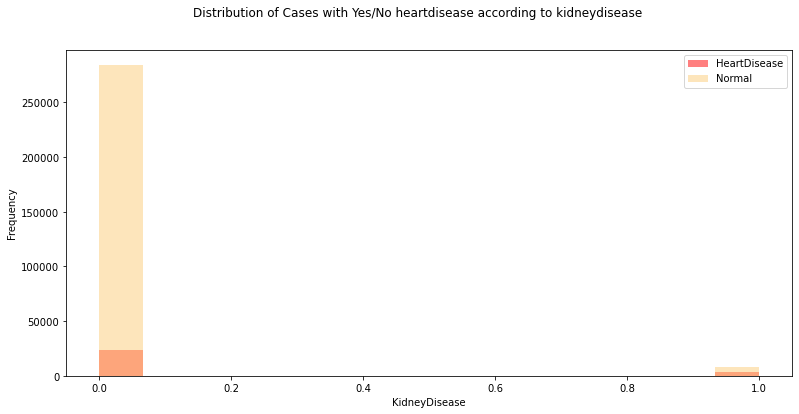

In [15]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["KidneyDisease"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["KidneyDisease"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to kidneydisease")

ax.legend();

心脏病患者(有无肾脏疾病)

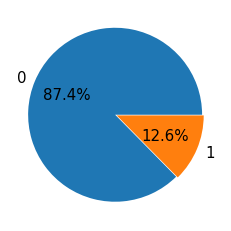

In [16]:
label=[0,1]
explode=[0.01,0.01]
data_sex=(df[df["HeartDisease"]==1]["KidneyDisease"])
plt.pie(data_sex.value_counts(),explode=explode,labels=label,autopct='%1.1f%%',textprops={'fontsize': 15, 'color': 'black'})
plt.show()

正常人(有无肾脏疾病)

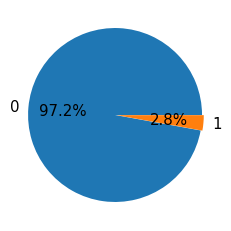

In [17]:
label=[0,1]
explode=[0.01,0.01]
data_sex=(df[df["HeartDisease"]==0]["KidneyDisease"])
plt.pie(data_sex.value_counts(),explode=explode,labels=label,autopct='%1.1f%%',textprops={'fontsize': 15, 'color': 'black'})
plt.show()

- 根据肾脏疾病的分列的有/无心脏病的病例分布情况
- 1代表患有肾脏疾病的人群
- 0代表正常人群
- 由表可知.患有肾脏疾病的人比无肾脏疾病的人患上心脏病的概率大

- Distribution of Cases with Yes/No heartdisease based on previous exposure to skin cancer(根据以往皮肤癌暴露情况，有“是”/“否”心脏病的病例分布情况)


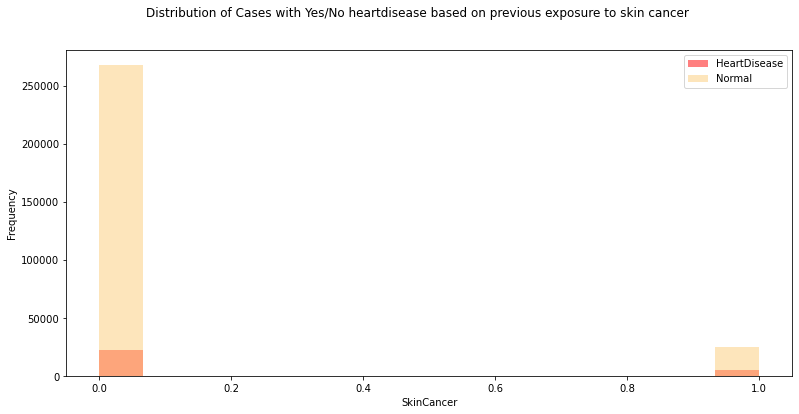

In [18]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["SkinCancer"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["SkinCancer"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("SkinCancer")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease based on previous exposure to skin cancer")

ax.legend();

心脏病患者(有无皮肤癌)

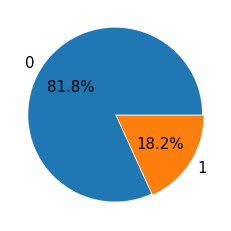

In [19]:
label=[0,1]
explode=[0.01,0.01]
data_sex=(df[df["HeartDisease"]==1]["SkinCancer"])
plt.pie(data_sex.value_counts(),explode=explode,labels=label,autopct='%1.1f%%',textprops={'fontsize': 15, 'color': 'black'})
plt.show()

正常人(有无皮肤癌)

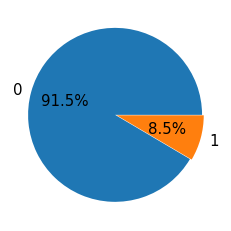

In [20]:
label=[0,1]
explode=[0.01,0.01]
data_sex=(df[df["HeartDisease"]==0]["SkinCancer"])
plt.pie(data_sex.value_counts(),explode=explode,labels=label,autopct='%1.1f%%',textprops={'fontsize': 15, 'color': 'black'})
plt.show()

- 由表可知.患有皮肤癌的人比无皮肤癌的人患上心脏病的概率大

- Distribution of Cases with Yes/No hartdisease based on previous exposure to Stroke
- 基于之前接触过中风的是/否硬疾病病例分布

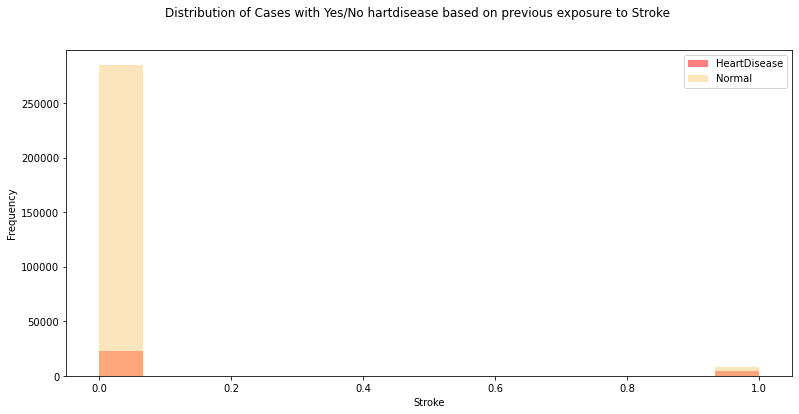

In [21]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Stroke"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Stroke"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Stroke")

ax.legend();

心脏病患者(有无中风)

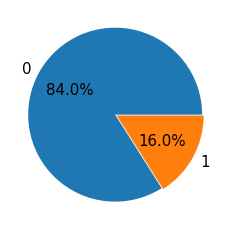

In [22]:
label=[0,1]
explode=[0.01,0.01]
data_sex=(df[df["HeartDisease"]==1]["Stroke"])
plt.pie(data_sex.value_counts(),explode=explode,labels=label,autopct='%1.1f%%',textprops={'fontsize': 15, 'color': 'black'})
plt.show()

正常人(有无中风)

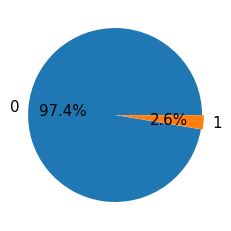

In [23]:
label=[0,1]
explode=[0.01,0.01]
data_sex=(df[df["HeartDisease"]==0]["Stroke"])
plt.pie(data_sex.value_counts(),explode=explode,labels=label,autopct='%1.1f%%',textprops={'fontsize': 15, 'color': 'black'})
plt.show()

- 由表可知.患有中风的人比无中风的人更加容易患上心脏病

- Distribution of Cases with Yes/No hartdisease based on previous exposure to Diabetic
- 根据以往接触过糖尿病的情况，有“是”/“否”心脏病的病例分布情况



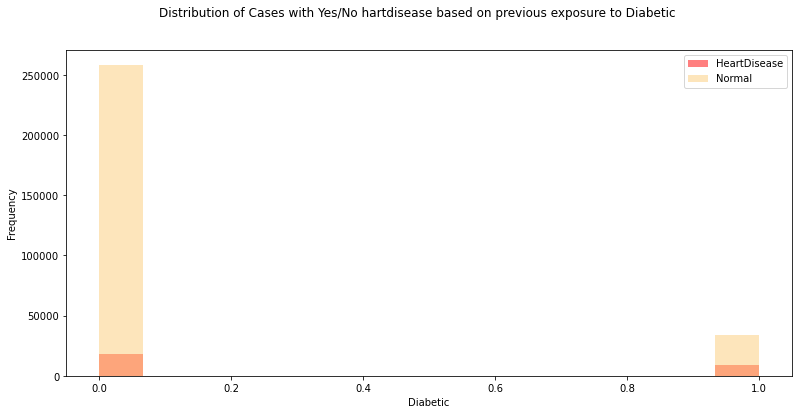

In [24]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Diabetic"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Diabetic"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Diabetic")

ax.legend();

心脏病患者(有无糖尿病)

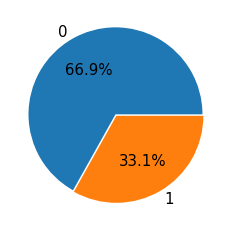

In [25]:
label=[0,1]
explode=[0.01,0.01]
data_sex=(df[df["HeartDisease"]==1]["Diabetic"])
plt.pie(data_sex.value_counts(),explode=explode,labels=label,autopct='%1.1f%%',textprops={'fontsize': 15, 'color': 'black'})
plt.show()

正常人(有无糖尿病)

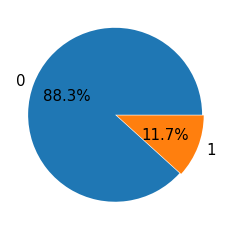

In [26]:
label=[0,1]
explode=[0.01,0.01]
data_sex=(df[df["HeartDisease"]==0]["Diabetic"])
plt.pie(data_sex.value_counts(),explode=explode,labels=label,autopct='%1.1f%%',textprops={'fontsize': 15, 'color': 'black'})
plt.show()

由表可知,患有糖尿病的人比患有其他疾病的人更容易患上心脏病

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>将数据可视化</b></p>
</div>

相关度表

<AxesSubplot:>

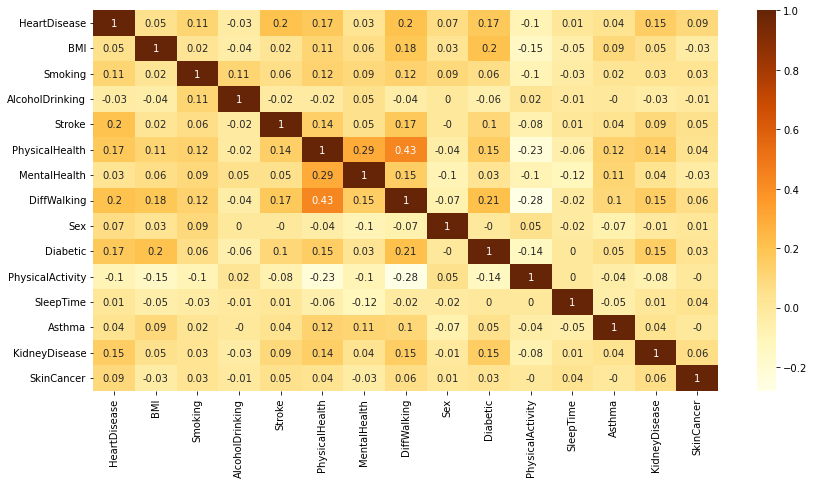

In [27]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

#数值特征的可视化

从相关性表来看,单项因素对于心脏病的联系不大,但综合来看,绝大多数的特征都和心脏病有所关联

- Distribution of correlation of features 特征相关性分布


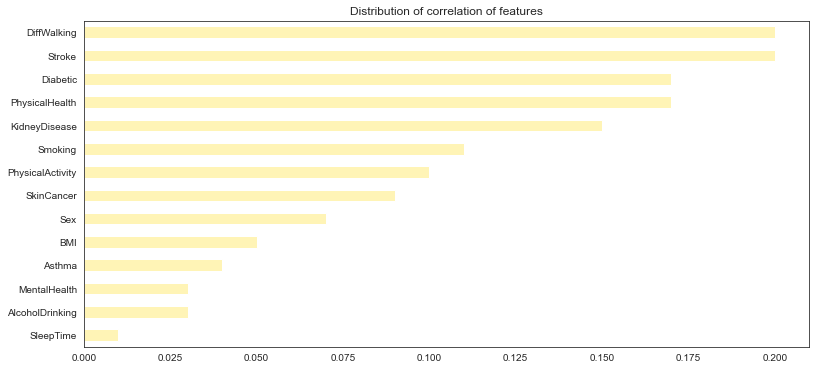

In [28]:
sns.set_style('white')
sns.set_palette('YlOrBr')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()


- 从特征性相关表来看,走路困难和中风是心脏病最显著的特征之一

- Distribution of Body Mass lndex
BMI指数分布



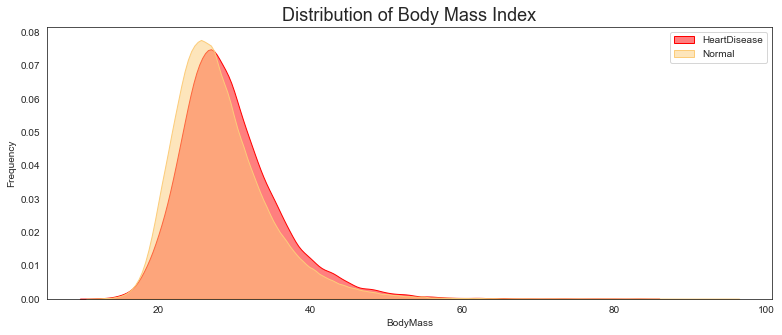

In [29]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()



由表可知,BMI指数对于有无心脏病影响不大

- Distribution of SleepTime values(睡眠质量分布)


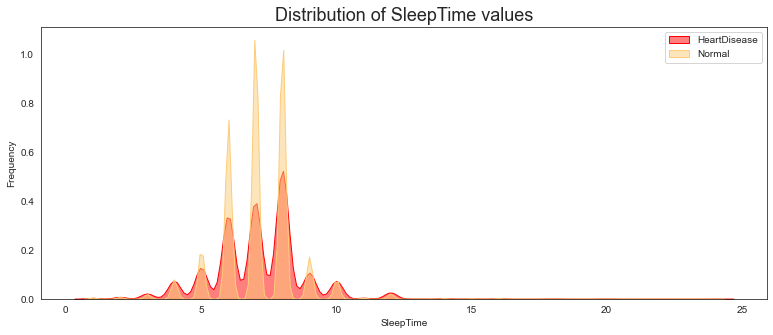

In [30]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["SleepTime"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["SleepTime"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of SleepTime values', fontsize = 18)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

- 由表可知,有无心脏病一定程度影响了人们的睡眠质量,说明了患有心脏病会让人睡眠质量变差

- Distribution of PhysicalHealth state for the last 30 days
(30天来人体健康状况的分布)



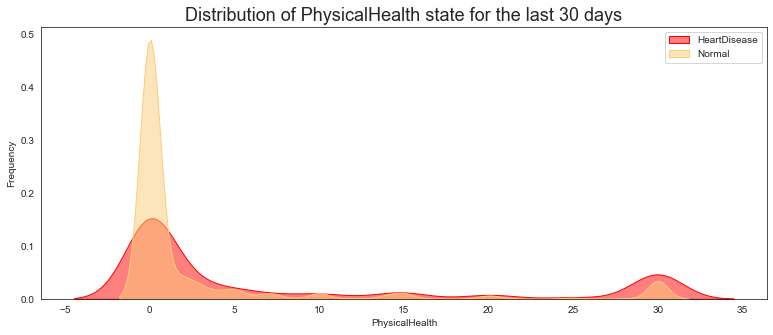

In [31]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of PhysicalHealth state for the last 30 days', fontsize = 18) # Read the introduction to know what the scale of numerical features mean
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

- 由表可知,患有心脏病的人开始养身,活动频率逐渐平缓,正常人继续每日的工作,活动频率活跃

- Distribution of MenalHealth state for the last 30 days(过去30天居民健康状况的分布)

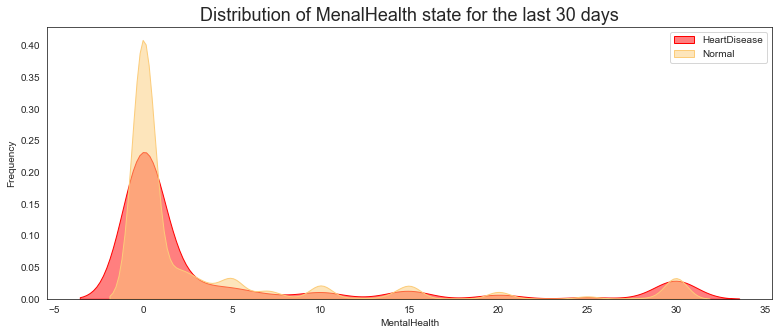

In [32]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["MentalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["MentalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of MenalHealth state for the last 30 days', fontsize = 18)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

- 由表可知,患有心脏病的人精神波动要比正常人的精神波动要小
- 患有心脏病的人精神状况要比正常人差

# <b><span style='color:#0386f7de'>|</span> 数据预处理</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>训练模型标准化</b></p>
</div>

In [33]:
from sklearn.preprocessing import StandardScaler 
num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth', 'SleepTime']
Scaler = StandardScaler()
df[num_cols] = Scaler.fit_transform(df[num_cols])

In [34]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder() 

# Encoding categorical features 
categ = df[['AgeCategory', 'Race', 'GenHealth']]
encoded_categ = pd.DataFrame(enc.fit_transform(categ).toarray())

#Likning the encoed_cateh with the df
df = pd.concat([df, encoded_categ], axis = 1)

# Dropping the categorical features
df = df.drop(columns = ['AgeCategory', 'Race', 'GenHealth'], axis = 1)

# <b><span style='color:#0386f7de'>|</span>拆分数据集进行训练和测试</b>

In [35]:
#Select Features
features = df.drop(columns =['HeartDisease'], axis = 1)

#Select Target 
target = df['HeartDisease']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (255836, 38)
Shape of testing feature: (63959, 38)
Shape of training label: (255836,)
Shape of training label: (63959,)


# <b><span style='color:#0386f7de'>|</span> 模型评估</b>

In [36]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>建立模型代码</b></p>
</div>

In [37]:
# Building a model using KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)


# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

In [ ]:
from sklearn import tree

# Building Decision Tree model 
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test, y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])

Accuracy: 0.86560140089745
Precision: 0.2347591781744695
Recall: 0.2559676827029012
F1 Score: 0.2449051300070274
Cohens Kappa Score: 0.17129246113576335
Area Under Curve: 0.5895004835188936
Confusion Matrix:
 [[53969  4544]
 [ 4052  1394]]


In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LR_eval = evaluate_model(LR, X_test, y_test)

print('Accuracy:', LR_eval['acc'])
print('Precision:', LR_eval['prec'])
print('Recall:', LR_eval['rec'])
print('F1 Score:', LR_eval['f1'])
print('Cohens Kappa Score:', LR_eval['kappa'])
print('Area Under Curve:', LR_eval['auc'])
print('Confusion Matrix:\n', LR_eval['cm'])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.9161181381822731
Precision: 0.5372585096596136
Recall: 0.1072346676459787
F1 Score: 0.17878463186897292
Cohens Kappa Score: 0.1548369570830146
Area Under Curve: 0.8401178700435248
Confusion Matrix:
 [[58010   503]
 [ 4862   584]]


In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RF_eval = evaluate_model(RF, X_test, y_test)

print('Accuracy:', RF_eval['acc'])
print('Precision:', RF_eval['prec'])
print('Recall:', RF_eval['rec'])
print('F1 Score:', RF_eval['f1'])
print('Cohens Kappa Score:', RF_eval['kappa'])
print('Area Under Curve:', RF_eval['auc'])
print('Confusion Matrix:\n', RF_eval['cm'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.9018120983755218
Precision: 0.2947834645669291
Recall: 0.10998898273962542
F1 Score: 0.16020326290451992
Cohens Kappa Score: 0.11945631172610116
Area Under Curve: 0.7347333080697673
Confusion Matrix:
 [[57080  1433]
 [ 4847   599]]


In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train)

NB_eval = evaluate_model(NB, X_test, y_test)

print('Accuracy:', NB_eval['acc'])
print('Precision:', NB_eval['prec'])
print('Recall:', NB_eval['rec'])
print('F1 Score:', NB_eval['f1'])
print('Cohens Kappa Score:', NB_eval['kappa'])
print('Area Under Curve:', NB_eval['auc'])
print('Confusion Matrix:\n', NB_eval['cm'])

Accuracy: 0.7140042839944339
Precision: 0.200224026883226
Recall: 0.78773411678296
F1 Score: 0.31929145579041385
Cohens Kappa Score: 0.21234023703820104
Area Under Curve: 0.8178968725959426
Confusion Matrix:
 [[41377 17136]
 [ 1156  4290]]


In [ ]:
MLP = MLPClassifier()
MLP.fit(X_train, y_train)

MLP_eval = evaluate_model(MLP, X_test, y_test)

print('Accuracy:', MLP_eval['acc'])
print('Precision:', MLP_eval['prec'])
print('Recall:', MLP_eval['rec'])
print('F1 Score:', MLP_eval['f1'])
print('Cohens Kappa Score:', MLP_eval['kappa'])
print('Area Under Curve:', MLP_eval['auc'])
print('Confusion Matrix:\n', MLP_eval['cm'])

Accuracy: 0.9153363873731609
Precision: 0.5126945126945127
Recall: 0.1149467499081895
F1 Score: 0.1877906104694765
Cohens Kappa Score: 0.1616437354819209
Area Under Curve: 0.8370399767844152
Confusion Matrix:
 [[57918   595]
 [ 4820   626]]


# <b><span style='color:#0386f7de'>|</span>模型对比</b>

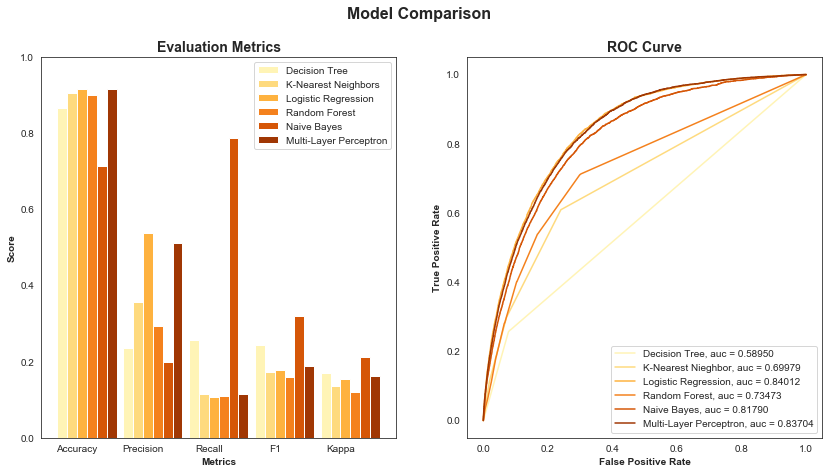

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.15
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
LR_score = [LR_eval['acc'], LR_eval['prec'], LR_eval['rec'], LR_eval['f1'], LR_eval['kappa']]
RF_score = [RF_eval['acc'], RF_eval['prec'], RF_eval['rec'], RF_eval['f1'], RF_eval['kappa']]
NB_score = [NB_eval['acc'], NB_eval['prec'], NB_eval['rec'], NB_eval['f1'], NB_eval['kappa']]
MLP_score = [MLP_eval['acc'], MLP_eval['prec'], MLP_eval['rec'], MLP_eval['f1'], MLP_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]


## Make the plot
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r3, LR_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r4, RF_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r5, NB_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r6, MLP_score, width=barWidth, edgecolor='white', label='Multi-Layer Perceptron')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(LR_eval['fpr'], LR_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(LR_eval['auc']))
ax2.plot(RF_eval['fpr'], RF_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(RF_eval['auc']))
ax2.plot(NB_eval['fpr'], NB_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(NB_eval['auc']))
ax2.plot(MLP_eval['fpr'], MLP_eval['tpr'], label='Multi-Layer Perceptron, auc = {:0.5f}'.format(MLP_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

- 评估指数表来看,多层感知和逻辑回归的准确度最高;k邻边的精确度最高;贝叶斯的召回率和F1最高;Kappa指数各个方法都相差不多
- 从特征曲线图来看,逻辑回归和多层感知的准确度最高

- Decision Tree 决策树
- K-Nearest Neighbors K邻边
- Logistic Regression 逻辑回归
- Random Forest随机森林
- Naive Bayes 朴素贝叶斯
- Multi-Layer Perceptron 多层感知器
- Evaluation Metrics 指标评测
- RoC Curve 特征曲线
